In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/MyDrive/data_analytics/vgsales.csv'
print('file path: ', file_path)

file path:  /content/drive/MyDrive/data_analytics/vgsales.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

print('import sukses')

import sukses


# Import dataset

In [5]:
df = pd.read_csv(file_path)

print('read success')

read success


In [ ]:
df

# Data Cleaning

In [ ]:
# See if there are null values
df.isnull().sum(axis=0)

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Delete all rows with null values
df.dropna(inplace=True)
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Analisa Deskriptif

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.shape

(16598, 11)

In [ ]:
df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Visualisasi

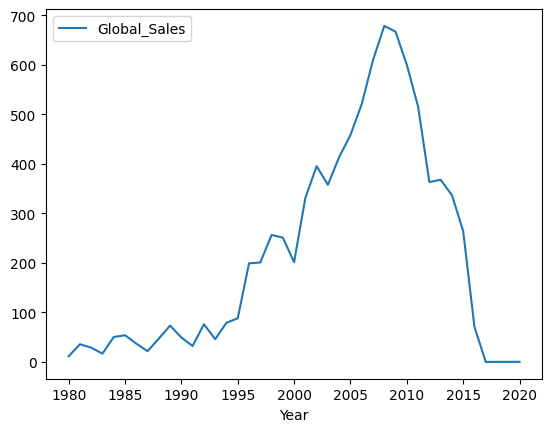

<Figure size 2000x600 with 0 Axes>

In [ ]:
# See global sales trend

# group by year
df_group = df.groupby('Year').sum()

# create plot
df_group.plot(kind='line', y='Global_Sales')
plt.figure(figsize=(20,6))
plt.show()

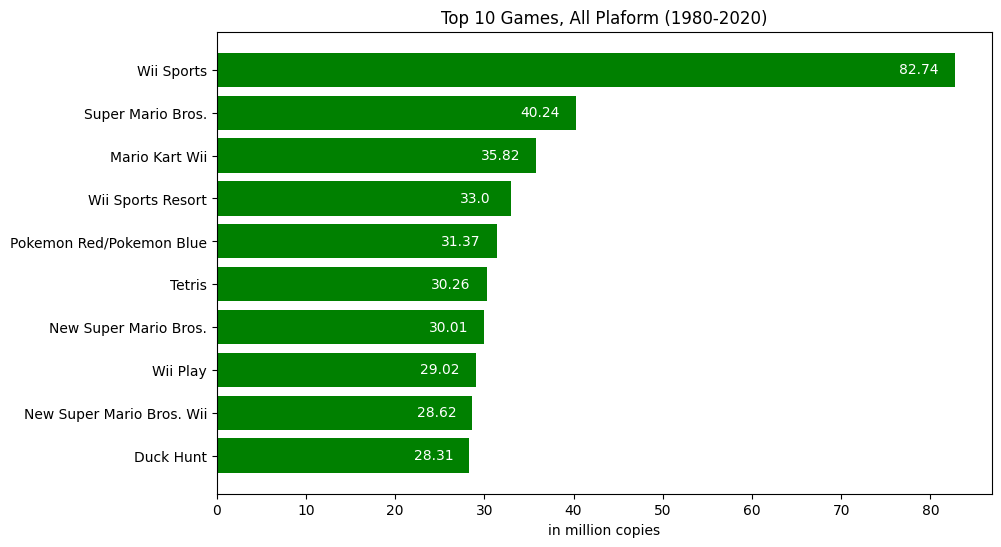

In [131]:
# top 5 game sales

df_top_game_0 = df.head(10)
df_top_game = df_top_game_0.sort_values('Global_Sales')
# df_top_game.plot(kind='bar', x='Name', y='Global_Sales')

plt.figure(figsize=(10,6))
plt.barh(df_top_game.Name, df_top_game.Global_Sales, color='green')

# plt.xticks(rotation=45, horizontalalignment = 'right')
plt.title('Top 10 Games, All Plaform (1980-2020)')
# plt.xlabel('')
plt.xlabel('in million copies')

for index, sales in enumerate(df_top_game.Global_Sales):
  plt.text(sales-4, index, str(sales), ha='center', va='center', color='white')

plt.show()

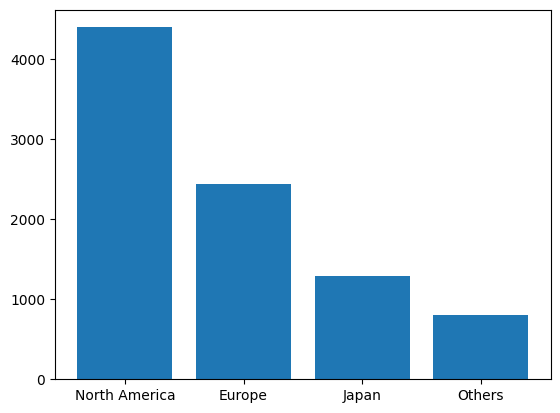

In [34]:
# Region total sales (long way)
na_sales = round(df['NA_Sales'].sum(), 2)
eu_sales = round(df['EU_Sales'].sum(), 2)
jp_sales = round(df['JP_Sales'].sum(), 2)
other_sales = round(df['Other_Sales'].sum(), 2)

sum_sales = [na_sales, eu_sales, jp_sales, other_sales]
name_sales = ['North America','Europe','Japan','Others']

plt.bar(name_sales, sum_sales)
plt.show()


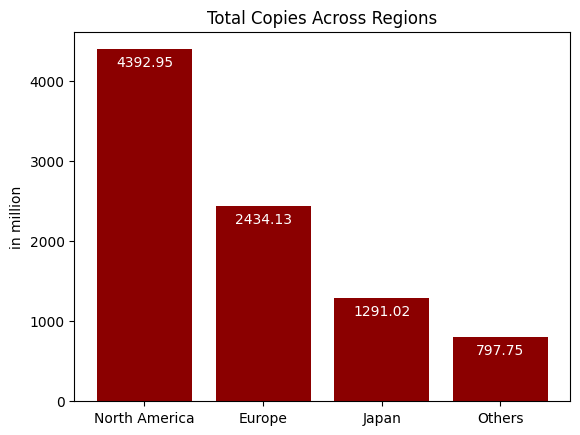

In [88]:
# Region total sales (short way)
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().to_frame()
region_sales_1 = region_sales.reset_index()
region_sales_1.columns = ['region','total']
region_sales_1

plt.bar(region_sales_1.region, region_sales_1.total, color='darkred')
plt.xticks([0,1,2,3],['North America','Europe','Japan','Others'])

plt.title('Total Copies Across Regions')

for index,value in enumerate(region_sales_1['total']):
  plt.text(index, value-250, str(round(value,2)), ha='center', va='bottom', color='white')

plt.ylabel('in million')
plt.show()


<ipython-input-120-83009aa26964>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  publishers = df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).reset_index()


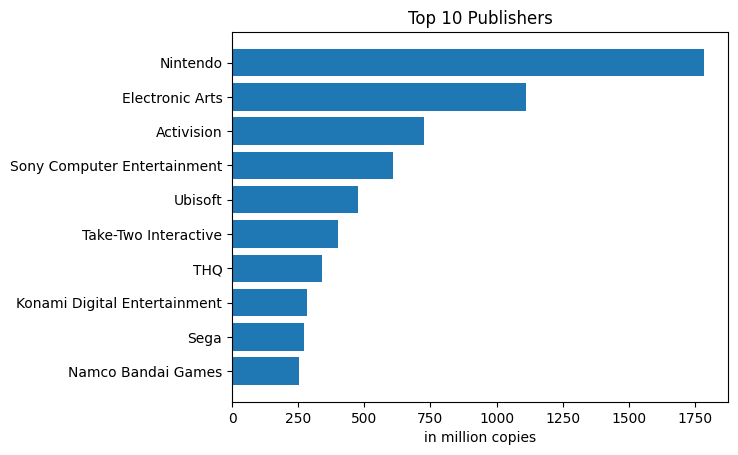

In [120]:
# top 10 publishers

publishers = df.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).reset_index()
top_pubs = publishers.head(10).sort_values('Global_Sales')

plt.barh(top_pubs['Publisher'], top_pubs['Global_Sales'])
plt.title('Top 10 Publishers')
plt.xlabel('in million copies')
plt.show()

# Kesimpulan